# Student Performans Analysis #
### This is the final project required for data science nanodegree by GA & Misk Academy ###

---

Dataset available at : https://archive.ics.uci.edu/ml/datasets/student+performance

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")
import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import classification_report

In [92]:
#Contents auto-fit
pd.set_option('display.max_colwidth', 0)
pd.set_option("display.max_columns",None)
pd.options.display.max_rows = 4000

# threshold of sccess variable
pass_score=10

## 1. Loading Dataset 

In [53]:
# load data files into data frame objects

math=pd.read_csv("./data/student-mat.csv",delimiter=";")
por=pd.read_csv("./data/student-por.csv",delimiter=";")
math['course']="math"
por['course']="por"
dictionary=pd.read_excel("./data/dictionary.xlsx")
#merging data frams into one data fram
students=pd.concat([math,por],ignore_index = True)

#### - Data Dictionary : 

In [54]:
dictionary

,Variable,New Name,Description,Encoding
0,school,school,student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira),"{""MS"":1,""GP"":2}"
1,sex,gender,student's sex (binary: 'F' - female or 'M' - male),"{""M"":1,""F"":0}"
2,age,age,student's age (numeric: from 15 to 22),NaN
3,address,address,student's home address type (binary: 'U' - urban or 'R' - rural),"{""U"":1,""R"":0}"
4,famsize,family_size,family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3),"{""GT3"":1,""LE3"":0}"
5,Pstatus,parents_status,parent's cohabitation status (binary: 'T' - living together or 'A' - apart),"{""T"":1,""A"":0}"
6,Medu,mother_education,"mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3-secondary education or 4 -higher education)",NaN
7,Fedu,father_education,"father's education (numeric: 0 - none, 1 - primary education (4th grade), 2(5th to 9th grade), 3-secondary education or 4-higher education)",NaN
8,Mjob,mother_job,"mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')","{'services':1, 'at_home':2, 'teacher':3, 'health':4, 'other':5}"
9,Fjob,father_job,"father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')","{'services':1, 'at_home':2, 'teacher':3, 'health':4, 'other':5}"


#### - Functions

In [55]:
# This function takes a column name as a parameter
# and returns a data frame with maximum and minimum value
# of a given column name associeted with a its row values
def min_max_value(col):
    top_index=students[col].idxmax()
    top_value=students["final_score"].max()
    d={top_value : students.loc[top_index] }
    top_obs=pd.DataFrame(data=d)
    
    bottom_index=students[col].idxmin()
    bottom_value=students["final_score"].min()
    d={bottom_value : students.loc[bottom_index]}
    bot_obs=pd.DataFrame(data=d)
    
    min_max_obs=pd.concat([top_obs,bot_obs],axis=1)
    
    return min_max_obs

In [56]:
# The plotting function below takes takes two arguments, the name of the column and the data associated with that column.
# I would call it repeatedly to plot some of variable distibutions. 
def distribution_plotter(column, data_set,x,y):
    data = data_set[column]
    sns.set(rc={"figure.figsize": (x, y)})
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

---

## 2. Exploratory Data Analysis (EDA)

- Before any analysis step, i would prefer to change column labels to more descriptive names (as shown in dictionary):

In [57]:
students.columns = ['school','gender','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score','course']

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p><b><span style="color:blue">&nbsp; How many rows and columns is there ? </span></b></p>

In [58]:
print("Rows: {}".format(students.shape[0]), "\nColumns: {}".format(students.shape[1]))

Rows: 1044 
Columns: 34


<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; What is the data types of columns? </span></b></p>

In [59]:
students.dtypes.value_counts()

object    18
int64     16
dtype: int64

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; What is the meta data of the dataset? </span></b></p>

In [90]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   school                 1044 non-null   int64  
 1   gender                 1044 non-null   int64  
 2   age                    1044 non-null   int64  
 3   address                1044 non-null   int64  
 4   family_size            1044 non-null   int64  
 5   parents_status         1044 non-null   int64  
 6   mother_job             1044 non-null   int64  
 7   father_job             1044 non-null   int64  
 8   reason                 1044 non-null   int64  
 9   guardian               1044 non-null   int64  
 10  commute_time           1044 non-null   int64  
 11  study_time             1044 non-null   int64  
 12  failures               1044 non-null   int64  
 13  school_support         1044 non-null   int64  
 14  family_support         1044 non-null   int64  
 15  paid

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; Is there any missing values? </span></b></p>

In [61]:
students.isnull().sum().sum()

0

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; Is there any row duplications? </span></b></p>

In [62]:
students.duplicated().sum()

0

<img src="./data/Notes.png" style="float:left; margin:0px; height: 20px">
<b><span style="color:brown">&nbsp; No missing values, No duplications, Great ! </span></b>

---

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; List statistical summary of numerical data ? </span></b></p>

In [63]:
students.describe().T.style

,count,mean,std,min,25%,50%,75%,max
age,1044.000000,16.726054,1.239975,15.000000,16.000000,17.000000,18.000000,22.000000
mother_education,1044.000000,2.603448,1.124907,0.000000,2.000000,3.000000,4.000000,4.000000
father_education,1044.000000,2.387931,1.099938,0.000000,1.000000,2.000000,3.000000,4.000000
commute_time,1044.000000,1.522989,0.731727,1.000000,1.000000,1.000000,2.000000,4.000000
study_time,1044.000000,1.970307,0.834353,1.000000,1.000000,2.000000,2.000000,4.000000
failures,1044.000000,0.264368,0.656142,0.000000,0.000000,0.000000,0.000000,3.000000
family_quality,1044.000000,3.935824,0.933401,1.000000,4.000000,4.000000,5.000000,5.000000
free_time,1044.000000,3.201149,1.031507,1.000000,3.000000,3.000000,4.000000,5.000000
go_out,1044.000000,3.156130,1.152575,1.000000,2.000000,3.000000,4.000000,5.000000
weekday_alcohol_usage,1044.000000,1.494253,0.911714,1.000000,1.000000,1.000000,2.000000,5.000000


<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; List statistical summary of categorical/textual data ? </span></b></p>

In [64]:
students.describe(include=['object']).T.style

,count,unique,top,freq
school,1044,2,GP,772
gender,1044,2,F,591
address,1044,2,U,759
family_size,1044,2,GT3,738
parents_status,1044,2,T,923
mother_job,1044,5,other,399
father_job,1044,5,other,584
reason,1044,4,course,430
guardian,1044,3,mother,728
school_support,1044,2,no,925


<img src="./data/Notes.png" style="float:left; margin:0px; height: 20px">  
<p><b><span style="color:brown"> 
   
   - It is noticeable that there are students who scored zero in the final exam!
   - 50% of students have scored 11 -and lower- of 20.
   - It seems there are outliers in absences variable. </span>
---

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; How many students got (Zero) score on final exam ? </span></b></p>

In [65]:
students[students['final_score'] == 0]["final_score"].count()

53

<img src="./data/Notes.png" style="float:left; margin:0px; height: 20px">  
<p><b><span style="color:brown"> 
    
   - For students who scored zero in the final exam, we do not have definite information as to whether these are real scores or are  parameter values for a reason, such as not taking the final exam.
   - As a result I would prefer not dropping relative rows. </span>

---

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; Statistically, descripe students who take 0 in final exam ? </span></b></p>

In [66]:
students[students['final_score'] == 0].describe()

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.000000,53.000000,53.0
mean,17.283019,2.301887,2.113208,1.660377,1.830189,0.886792,3.849057,3.245283,3.169811,1.490566,2.132075,3.660377,0.0,7.396226,4.415094,0.0
std,1.246184,1.066715,1.068075,0.758120,0.848887,1.012620,1.098885,0.958879,1.410617,0.799583,1.256334,1.300050,0.0,1.801064,3.707757,0.0
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,4.000000,0.000000,0.0
25%,16.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.0,6.000000,0.000000,0.0
50%,18.000000,2.000000,2.000000,2.000000,2.000000,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.0,7.000000,5.000000,0.0
75%,18.000000,3.000000,3.000000,2.000000,2.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,0.0,8.000000,8.000000,0.0
max,19.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,0.0,12.000000,10.000000,0.0


<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp;Who is the top ten percent of students performing in the final exam?? </span></b></p>

In [67]:
Top_10_perc = students.sort_values(by="final_score",ascending=False).head(int(round((students["age"].count())) * .10))
Top_10_perc

,school,gender,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,reason,guardian,commute_time,study_time,failures,school_support,family_support,paid_classes,activities,nursery,desire_higher_edu,internet,romantic,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,course
47,GP,M,16,U,GT3,T,4,3,health,services,reputation,mother,1,4,0,no,no,no,yes,yes,yes,yes,no,4,2,2,1,1,2,4,19,19,20,math
286,GP,F,18,U,GT3,T,2,2,at_home,at_home,other,mother,1,3,0,no,yes,yes,no,yes,yes,yes,no,4,3,3,1,2,2,5,18,18,19,math
374,MS,F,18,R,LE3,T,4,4,other,other,reputation,mother,2,3,0,no,no,no,no,yes,yes,yes,no,5,4,4,1,1,1,0,19,18,19,math
113,GP,M,15,U,LE3,T,4,2,teacher,other,course,mother,1,1,0,no,no,no,no,yes,yes,yes,no,3,5,2,1,1,3,10,18,19,19,math
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,course,mother,1,1,0,no,no,no,yes,yes,yes,yes,no,5,5,3,1,1,4,6,18,19,19,math
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,GP,F,15,R,LE3,T,3,1,other,other,reputation,father,2,4,0,no,yes,no,no,no,yes,yes,no,4,4,2,2,3,3,12,16,16,16,math
299,GP,M,18,U,LE3,T,4,4,teacher,teacher,home,mother,1,1,0,no,yes,yes,no,yes,yes,yes,yes,1,4,2,2,2,1,5,16,15,16,math
596,GP,M,16,U,LE3,T,2,1,other,other,course,mother,1,2,0,no,no,no,yes,yes,yes,yes,yes,4,2,3,1,2,5,0,13,14,16,por
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,math



<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp;What is the main statistical characteristics of top ten percent of students performing in the final exam?</span></b></p>

In [68]:
Top_10_perc.describe(include="all").T.style

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,104,2,GP,83,nan,nan,nan,nan,nan,nan,nan
gender,104,2,F,62,nan,nan,nan,nan,nan,nan,nan
age,104.000000,nan,nan,nan,16.634615,1.061760,15.000000,16.000000,17.000000,17.000000,20.000000
address,104,2,U,82,nan,nan,nan,nan,nan,nan,nan
family_size,104,2,GT3,68,nan,nan,nan,nan,nan,nan,nan
parents_status,104,2,T,91,nan,nan,nan,nan,nan,nan,nan
mother_education,104.000000,nan,nan,nan,3.221154,0.964986,1.000000,3.000000,4.000000,4.000000,4.000000
father_education,104.000000,nan,nan,nan,2.701923,1.156491,0.000000,2.000000,3.000000,4.000000,4.000000
mother_job,104,5,services,32,nan,nan,nan,nan,nan,nan,nan
father_job,104,5,other,48,nan,nan,nan,nan,nan,nan,nan



 
 <img src="./data/Notes.png" style="float:left; margin:0px; height: 20px">  
<p><b><span style="color:brown"> 
    
   - Notes on the top 10 percent of students : 
 - More than 50 percent of students are female
 - More than 85 percent of students live with their parents
 - Almost 75 percent of students do not have emotional relationships
 - All of students wants to take higher education 
 - Almost 99 percent of student did not get extra educational support </span>

---



<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp;Do males doing better than females in final exam?</span></b></p>

In [69]:
students.groupby('gender').final_score.mean()

gender
F    11.448393
M    11.203091
Name: final_score, dtype: float64

 <img src="./data/Notes.png" style="float:left; margin:0px; height: 20px">  
<p><b><span style="color:brown"> 
    
   - Females scored bit hieghr than males In average . </span>

---

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; Comparing students performance among two schools ,by gender:</span></b></p>

In [70]:
 pd.crosstab([students.gender],students.school,values=students["final_score"],aggfunc="mean",margins=True)
    

school,GP,MS,All
gender,,,
F,11.683333,10.871345,11.448393
M,11.573864,9.910891,11.203091
All,11.633420,10.514706,11.341954


<img src="./data/Notes.png" style="float:left; margin:0px; height: 20px">  
<p><b><span style="color:brown"> 
    
  - From above table we can see that GP students performed better than MS students. </span>

---

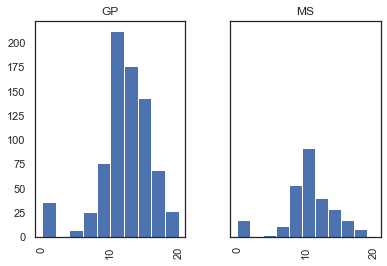

In [71]:
plt.size=(3,3)
students.hist(column='final_score', by='school',sharex=True, sharey=True);

---


<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp;How students ages are distriputed ?</span></b></p>

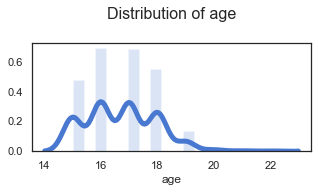

In [72]:
distribution_plotter("age", students,5,2) 



<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; For each age, how many students? and what is the mean and median of there final score ?</span></b></p>

In [73]:
students.groupby(['age','gender']).final_score.agg(["count","mean","median"])

count       mean  median
age gender                          
15  F       95     11.021053  11.0  
    M       99     12.444444  12.0  
16  F       159    11.779874  12.0  
    M       122    11.450820  11.5  
17  F       171    12.070175  12.0  
    M       106    10.745283  10.0  
18  F       127    11.125984  11.0  
    M       95     10.715789  11.0  
19  F       33     8.939394   10.0  
    M       23     9.000000   10.0  
20  F       5      12.400000  12.0  
    M       4      13.000000  12.5  
21  F       1      12.000000  12.0  
    M       2      8.500000   8.5   
22  M       2      6.500000   6.5


<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp;Who is the best and lowest performing among students</span></b></p>

In [74]:
 min_max_value("final_score")

,20,0
school,GP,GP
gender,M,M
age,16,18
address,U,R
family_size,GT3,GT3
parents_status,T,T
mother_education,4,2
father_education,3,2
mother_job,health,services
father_job,services,other


<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; How final scores are disriputed ?</span></b></p>

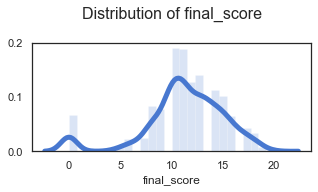

In [75]:
distribution_plotter("final_score", students,5,2)

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; What is the relationship between period1_score and period2_score ?</span></b></p>

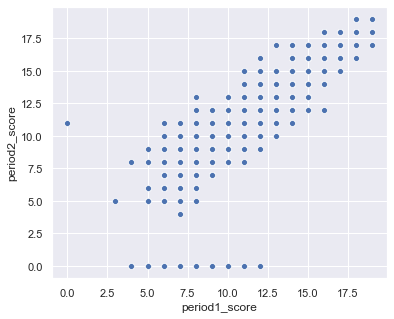

In [76]:
sns.set(rc={"figure.figsize": (6, 5)})
ax=sns.scatterplot(x="period1_score", y="period2_score",data=students)

<img src="./data/Notes.png" style="float:left; margin:0px; height: 20px">  
<p><b><span style="color:brown"> 
    
- There is a positive linear relationship between *period1_score* and *period2_score*. </span>
---

<img src="./data/QA.png" style="float:left; margin:0px; height: 30px"> 
<p> <b><span style="color:blue">&nbsp; Is there a correlation among the columns in the dataframe using ‘Pearson’ method. ? </span></b></p>

In [77]:
students.corr(method ='pearson')

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score
age,1.000000,-0.130196,-0.138521,0.049216,-0.007870,0.282364,0.007162,0.002645,0.118510,0.133453,0.098291,-0.029129,0.153196,-0.124121,-0.119475,-0.125282
mother_education,-0.130196,1.000000,0.642063,-0.238181,0.090616,-0.187769,0.015004,0.001054,0.025614,0.001515,-0.029331,-0.013254,0.059708,0.226101,0.224662,0.201472
father_education,-0.138521,0.642063,1.000000,-0.196328,0.033458,-0.191390,0.013066,0.002142,0.030075,-0.000165,0.019524,0.034288,0.040829,0.195898,0.182634,0.159796
commute_time,0.049216,-0.238181,-0.196328,1.000000,-0.081328,0.087177,-0.012578,-0.007403,0.049740,0.109423,0.084292,-0.029002,-0.022669,-0.121053,-0.140163,-0.102627
study_time,-0.007870,0.090616,0.033458,-0.081328,1.000000,-0.152024,0.012324,-0.094429,-0.072941,-0.159665,-0.229073,-0.063044,-0.075594,0.211314,0.183167,0.161629
failures,0.282364,-0.187769,-0.191390,0.087177,-0.152024,1.000000,-0.053676,0.102679,0.074683,0.116336,0.107432,0.048311,0.099998,-0.374175,-0.377172,-0.383145
family_quality,0.007162,0.015004,0.013066,-0.012578,0.012324,-0.053676,1.000000,0.136901,0.080619,-0.076483,-0.100663,0.104101,-0.062171,0.036947,0.042054,0.054461
free_time,0.002645,0.001054,0.002142,-0.007403,-0.094429,0.102679,0.136901,1.000000,0.323556,0.144979,0.130377,0.081517,-0.032079,-0.051985,-0.068952,-0.064890
go_out,0.118510,0.025614,0.030075,0.049740,-0.072941,0.074683,0.080619,0.323556,1.000000,0.253135,0.399794,-0.013736,0.056142,-0.101163,-0.108411,-0.097877
weekday_alcohol_usage,0.133453,0.001515,-0.000165,0.109423,-0.159665,0.116336,-0.076483,0.144979,0.253135,1.000000,0.627814,0.065515,0.132867,-0.150943,-0.131576,-0.129642


## Visualizing correlations:

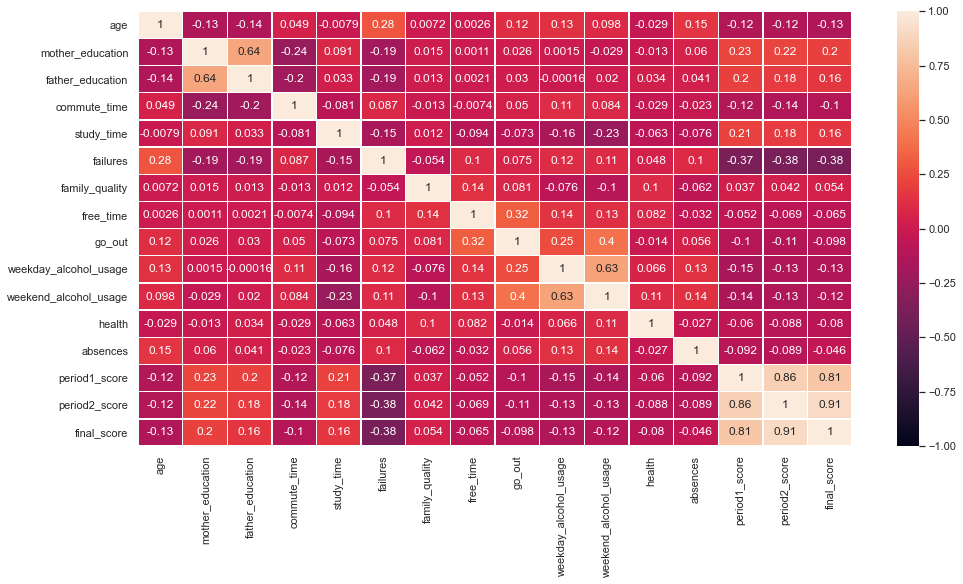

In [78]:
sns.set_palette("coolwarm", 7)
sns.set(rc={"figure.figsize": (16, 8)})
sns.heatmap(students.corr(method ='pearson'), annot=True, linewidth=0.4, vmin=-1, vmax=1)
plt.yticks(rotation=0);

## 2.Features Engineering

- Because **period1_score** and **period2_score** are highly correlated, i will combine them into one variable taking thier average.

In [79]:
students["avg_Periods_score"]=(students["period1_score"]+students["period2_score"])/2
students.drop(columns=["period1_score","period2_score"],inplace=True)

---

- Creating new columns to indicate if the student is pass the final exam or not assuming that pass_score=10 , i will use this column as a target in a classification model .

In [80]:
students['pass'] = students.apply(lambda row: row.final_score > pass_score , axis=1)

---

- Because **mother_education** and **father_education** are correlated, i will combine them into one variable taking thier average.

In [81]:
#students["mother_education"].corr(students["father_education"])
students["avg_parents_education"]=(students["mother_education"]+students["father_education"])/2
students.drop(columns=["mother_education","father_education"],inplace=True)

---

- Because **weekday_alcohol_usage** and **weekend_alcohol_usage** are highly correlated, i will combine them into one variable taking thier average.

In [82]:
#students.weekday_alcohol_usage.corr(students.weekend_alcohol_usage)
students["avg_alcohol_usage"]=(students["weekday_alcohol_usage"]+students["weekend_alcohol_usage"])/2
students.drop(columns=["weekday_alcohol_usage","weekend_alcohol_usage"],inplace=True)

---

### - How dependant variable **final_score** is correlated with independant variables?

In [83]:
students.corr()["final_score"]

age                     -0.125282
commute_time            -0.102627
study_time               0.161629
failures                -0.383145
family_quality           0.054461
free_time               -0.064890
go_out                  -0.097877
health                  -0.080079
absences                -0.045671
final_score              1.000000
avg_Periods_score        0.894479
pass                     0.733140
avg_parents_education    0.199607
avg_alcohol_usage       -0.134244
Name: final_score, dtype: float64

--- 

### - How independant variables are correlated with each other ?

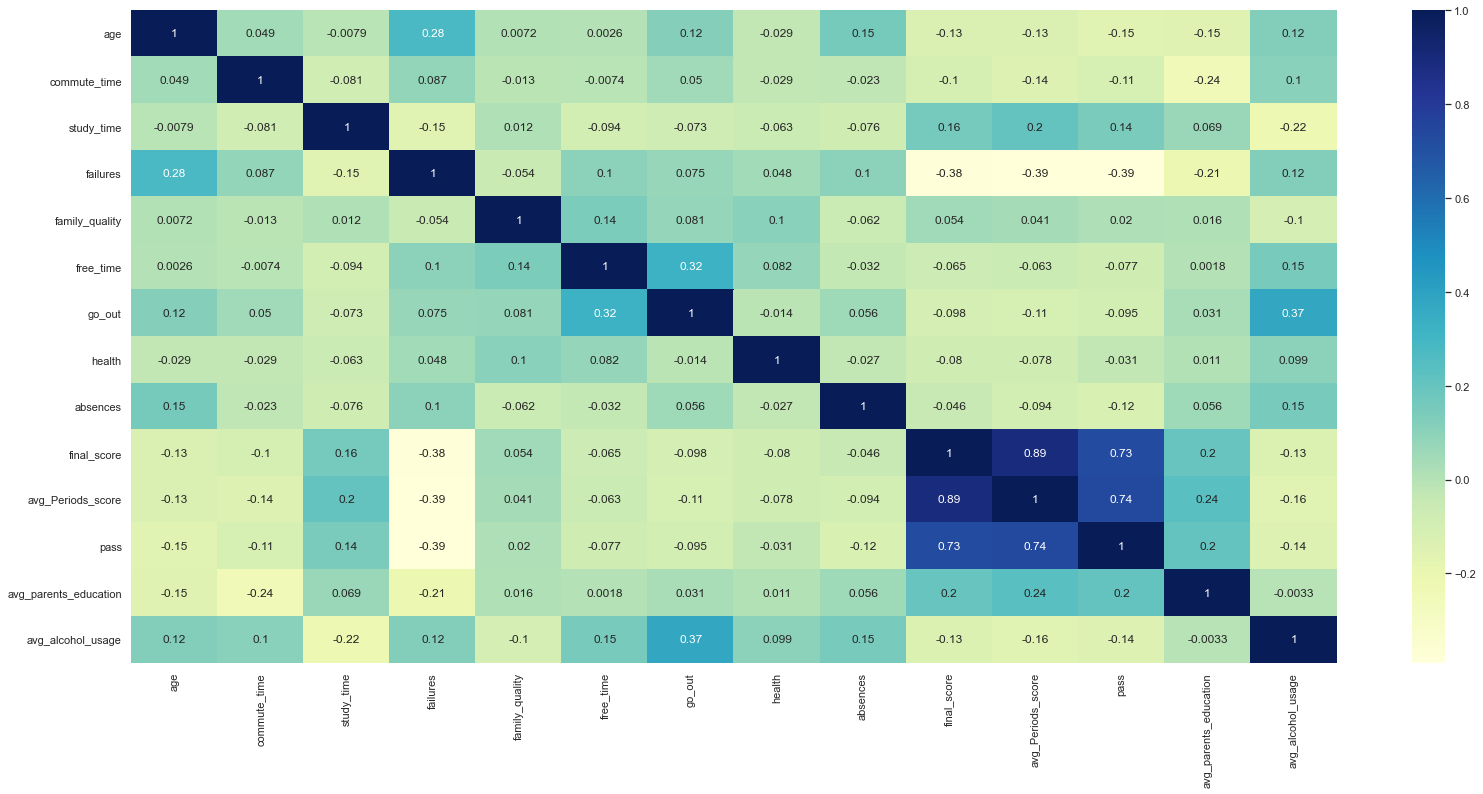

In [84]:
plt.figure(figsize=(27,12))
sns.heatmap(students.corr(),annot=True,cmap='YlGnBu')

## 2.Features Engineering

For modeling purpose, i would convert all categorical values to numerical:

In [85]:
#Bivariant 
students["school"]=students["school"].map({"MS":1,"GP":2})
students["gender"]=students["gender"].map({"M":1,"F":0})
students["family_size"]=students["family_size"].map({"GT3":1,"LE3":0})
students["address"]=students["address"].map({"U":1,"R":0})
students["parents_status"]=students["parents_status"].map({"T":1,"A":0})
#YES/NO 
students["school_support"]=students["school_support"].map({"yes":1,"no":0})
students["family_support"]=students["family_support"].map({"yes":1,"no":0})
students["paid_classes"]=students["paid_classes"].map({"yes":1,"no":0})
students["activities"]=students["activities"].map({"yes":1,"no":0})
students["nursery"]=students["nursery"].map({"yes":1,"no":0})
students["desire_higher_edu"]=students["desire_higher_edu"].map({"yes":1,"no":0})
students["internet"]=students["internet"].map({"yes":1,"no":0})
students["romantic"]=students["romantic"].map({"yes":1,"no":0})
#Multivariant 
students['mother_job'] = students['mother_job'].map({'services':1, 'at_home':2, 'teacher':3, 'health':4, 'other':5})
students['father_job'] = students['father_job'].map({'services':1, 'at_home':2, 'teacher':3, 'health':4, 'other':5})
students['reason'] = students['reason'].map({'course':1, 'home':2, 'reputation':3, 'other':4})
students['guardian'] = students['guardian'].map({'mother':1, 'father':2, 'other':3})

In [86]:
students_copy = pd.get_dummies(students,drop_first=True)
students_copy

,school,gender,age,address,family_size,parents_status,mother_job,father_job,reason,guardian,commute_time,study_time,failures,school_support,family_support,paid_classes,activities,nursery,desire_higher_edu,internet,romantic,family_quality,free_time,go_out,health,absences,final_score,avg_Periods_score,pass,avg_parents_education,avg_alcohol_usage,course_por
0,2,0,18,1,1,0,2,3,1,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,3,6,6,5.5,False,4.0,1.0,0
1,2,0,17,1,1,1,2,5,1,2,1,2,0,0,1,0,0,0,1,1,0,5,3,3,3,4,6,5.0,False,1.0,1.0,0
2,2,0,15,1,0,1,2,5,4,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,3,10,10,7.5,False,1.0,2.5,0
3,2,0,15,1,1,1,4,1,2,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,5,2,15,14.5,True,3.0,1.0,0
4,2,0,16,1,1,1,5,5,2,2,1,2,0,0,1,1,0,1,1,0,0,4,3,2,5,4,10,8.0,False,3.0,1.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,0,19,0,1,1,1,5,1,1,1,3,1,0,0,0,1,0,1,1,0,5,4,2,5,4,10,10.5,False,2.5,1.5,1
1040,1,0,18,1,0,1,3,1,1,1,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,4,16,15.0,True,2.0,1.0,1
1041,1,0,18,1,1,1,5,5,1,1,2,2,0,0,0,0,1,1,1,0,0,1,1,1,5,6,9,11.5,False,1.0,1.0,1
1042,1,1,17,1,0,1,1,1,1,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,2,6,10,10.0,False,2.0,3.5,1


In [87]:
most_correlated = students.corr().abs()['final_score'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
most_correlated

final_score              1.000000
avg_Periods_score        0.894479
pass                     0.733140
failures                 0.383145
desire_higher_edu        0.236578
avg_parents_education    0.199607
study_time               0.161629
avg_alcohol_usage        0.134244
school                   0.127114
Name: final_score, dtype: float64